In [12]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


              Rating
Day                 
2018-01-01  4.532609
2018-01-02  4.122807
2018-01-03  4.360465
2018-01-04  4.531250
2018-01-05  4.423077
...              ...
2021-03-29  4.240000
2021-03-30  4.428571
2021-03-31  4.453125
2021-04-01  4.592593
2021-04-02  4.357143

[1188 rows x 1 columns]


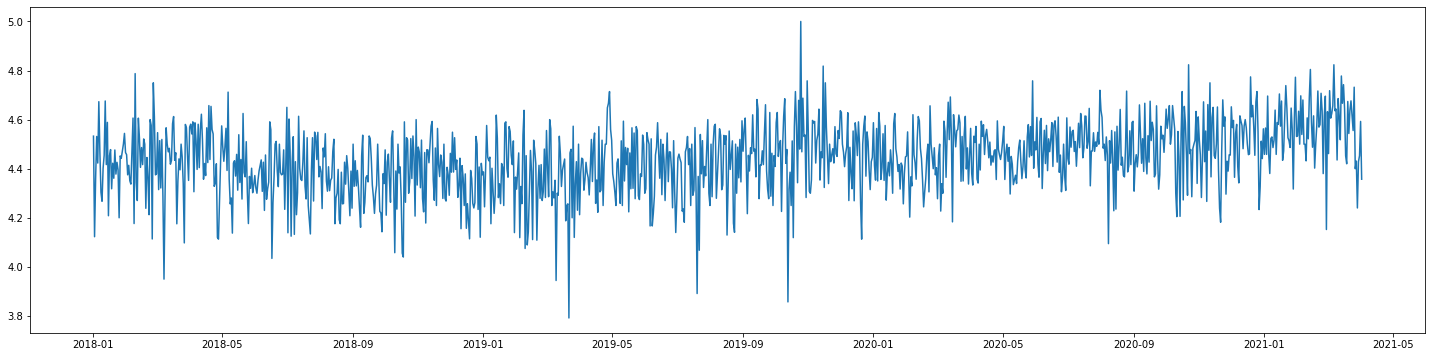

In [13]:
data['Day'] = data['Timestamp'].dt.date

# data['New Rating'] = data['Rating']*2+10
day_average = data.groupby(['Day']).mean()
print(day_average)

plt.figure(figsize=(25,6))
plt.plot(day_average.index, day_average['Rating'])

### Rating Average By Week

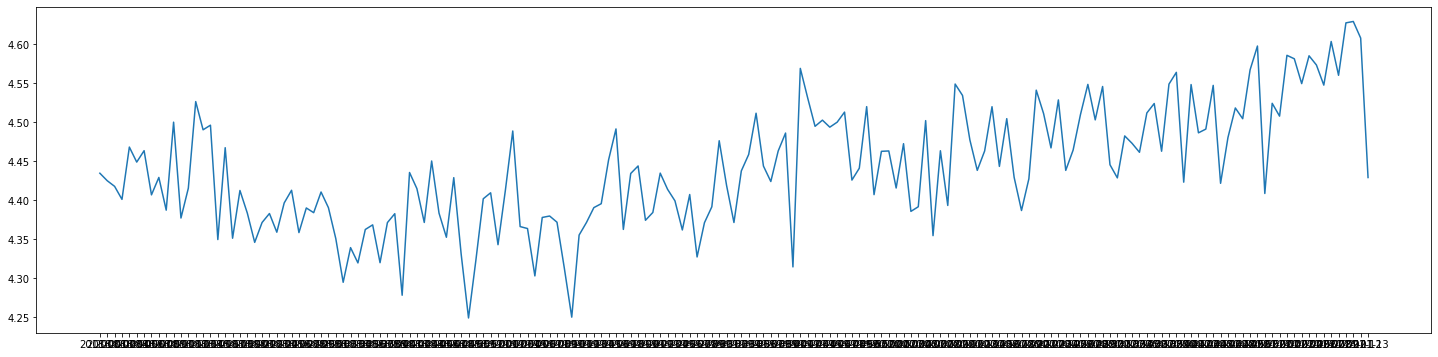

In [14]:
# data['Timestamp'].dt.isocalendar()['week']
data['Timestamp'].dt.strftime("%Y-%U")

data['Week'] = data['Timestamp'].dt.strftime("%Y-%U")

week_average = data.groupby('Week').mean()
week_average


plt.figure(figsize=(25,6))
plt.plot(week_average.index, week_average['Rating']) # passing indexes of week_average dataframe to be used as x-axis for plotting

### Average Ratings by Month


In [15]:
data['Month'] = data['Timestamp'].dt.strftime("%Y-%m")

monthly_average = data.groupby('Month').mean()
monthly_average

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420
2018-06,4.375379
2018-07,4.393184
2018-08,4.344753
2018-09,4.347247


### Average Rating by Month by Course

In [16]:
month_course_average = data.groupby(['Month', 'Course Name']).mean()
month_course_average

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

In [17]:
# month_course_average_b = data.groupby(['Month', 'Course Name']).mean().unstack()
# month_course_average_b = data.groupby(['Month', 'Course Name']).count().unstack()
month_course_average_b = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()


# plt.figure(figsize=(25,6))
# plt.plot(x=month_course_average_b.index)


# month_course_average_b.head()
(month_course_average_b["100 Python Exercises I: Evaluate and Improve Your Skills"])
# month_course_average_b.columns

# month_course_average_b.plot(figsize=(25,10))

Month
2018-01    4.353448
2018-02    4.250000
2018-03    4.500000
2018-04    4.431034
2018-05    4.358696
2018-06    4.268293
2018-07    4.589286
2018-08    4.353659
2018-09    4.238636
2018-10    4.106061
2018-11    4.212766
2018-12    4.405172
2019-01    4.048780
2019-02    4.333333
2019-03    4.269231
2019-04    4.365854
2019-05    4.486111
2019-06    4.442308
2019-07    4.414634
2019-08    4.222222
2019-09    4.531250
2019-10    4.287500
2019-11    4.512195
2019-12    4.152778
2020-01    4.277778
2020-02    4.200000
2020-03    4.240000
2020-04    4.329268
2020-05    4.340909
2020-06    4.397059
2020-07    4.250000
2020-08    4.121622
2020-09    4.307692
2020-10    4.366667
2020-11    4.461538
2020-12    4.294118
2021-01    4.283333
2021-02    4.450000
2021-03    4.190476
2021-04    4.500000
Name: 100 Python Exercises I: Evaluate and Improve Your Skills, dtype: float64

### What day of week are people the happiest

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynum'])


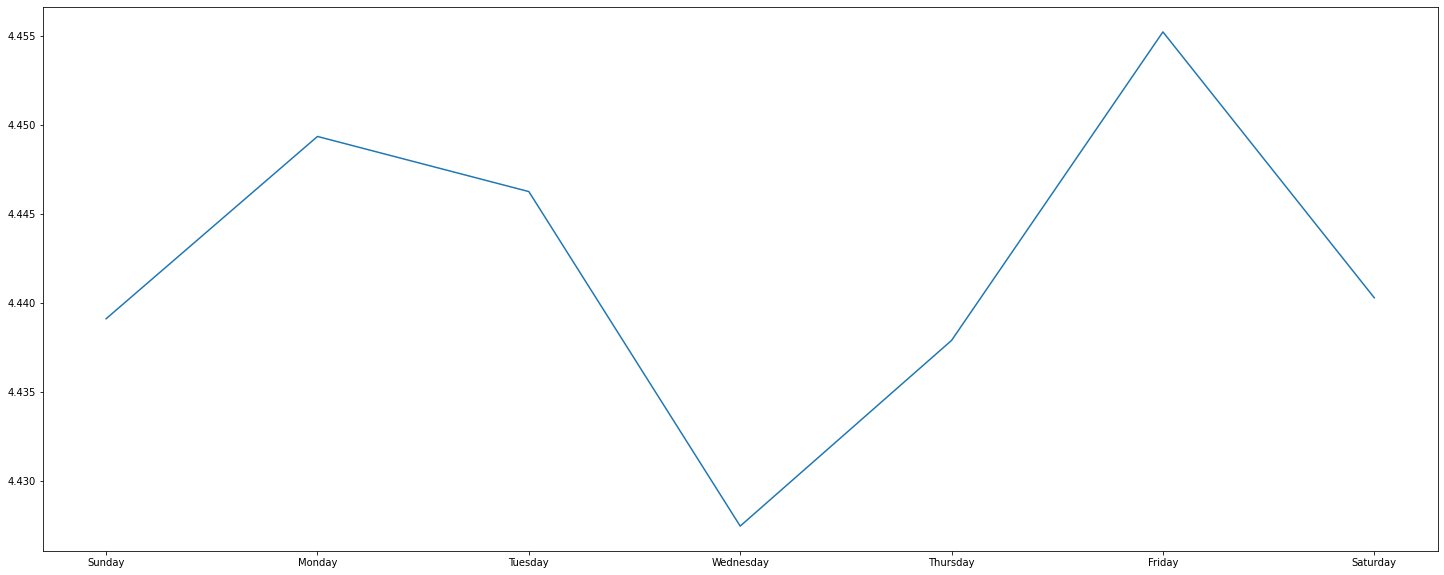

In [18]:
data['Weekday'] = data['Timestamp'].dt.strftime("%A")
data['Daynum'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(["Weekday", "Daynum"]).mean().sort_values('Daynum')
print(weekday_average.index)

plt.figure(figsize=(25,10))
# print(weekday_average.index.get_level_values(0))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

### Ratings by Course
#### Pie  Graph

In [19]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

In [30]:
from operator import index


share = data.groupby('Course Name')['Rating'].count()
for i in share.index:
    print(i)
# plt.pie(share)

100 Python Exercises I: Evaluate and Improve Your Skills
100 Python Exercises II: Evaluate and Improve Your Skills
Data Processing with Python
Interactive Data Visualization with Python and Bokeh
Learn GIS in One Hour
Python for Beginners with Examples
The Complete Python Course: Build 10 Professional OOP Apps
The Python Mega Course: Build 10 Real World Applications
